In [ ]:
!pip install networkx matplotlib

In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra_with_paths (graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous = {node: None for node in graph}
    queue = [(0, start)]

    while queue:
      current_distance, current_node = heapq.heappop(queue)

      for neighbor, weight in graph [current_node].items() :
          distance = current_distance + weight
          if distance < distances [neighbor]:
              distances [neighbor] = distance
              previous[neighbor] = currentnode
              heapq.heappush(queue, (distance, neighbor))

    return distances, previous

In [3]:
def get_path(previous, target):
      path = []
      while target is not None:
          path.insert(0, target)
          target = previous [target]
      return path


In [6]:
import matplotlib.pyplot as plt

def visualize_graph (graph, path=None):
    G = nx.DiGraph ()

    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge (node, neighbor, weight=weight)

    pos = nx.spring_layout (G)
    edge_labels = nx.get_edge_attributes (G, 'weight')

    plt.figure(figsize=(8, 6))
    nx.draw (G, pos, with_labels=True, node_color='lightblue', node_size=2000,
font_weight='bold', arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Garis tebal untuk jalur terpendek
    if path and len (path) > 1:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)

    plt.title("Visualisasi Graf dan Jalur Terpendek")
    plt.axis('off')
    plt.show()

In [11]:
# Definisi graf
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'C': 1, 'D': 5},
    'C': {'D': 8, 'E': 10},
    'D': {'E': 2, 'Z': 6},
    'E': {'Z': 3},
    'Z': {}
}

# Jalankan Dijkstra
start_node = 'A'
end_node = 'Z'
distances, previous = dijkstra_with_paths(graph, start_node)

# Rekonstruksi jalur
shortest_path = get_path(previous, end_node)
print(f"Jarak dari {start_node} ke {end_node}: {distances[end_node]}")
print(f"Jalur: {' → '.join(shortest_path)}")

# Visualisasi
visualize_graph(graph, path=shortest_path)

NameError: name 'dijkstra_with_paths' is not defined

Jarak dari A ke Z: 14
Jalur: A → B → D → E → Z


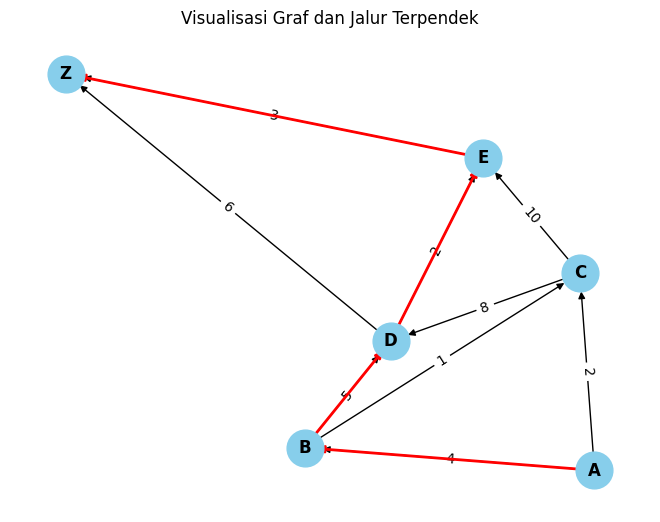

In [12]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

# Definisi graf
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'C': 1, 'D': 5},
    'C': {'D': 8, 'E': 10},
    'D': {'E': 2, 'Z': 6},
    'E': {'Z': 3},
    'Z': {}
}

# Fungsi Dijkstra
def dijkstra_with_paths(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous = {node: None for node in graph}
    queue = [(0, start)]

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    return distances, previous

# Fungsi untuk merekonstruksi jalur
def get_path(previous, end):
    path = []
    current = end
    while current:
        path.insert(0, current)
        current = previous[current]
    return path

# Fungsi visualisasi graf
def visualize_graph(graph, path=None):
    G = nx.DiGraph()

    for node, edges in graph.items():
        for neighbor, weight in edges.items():
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G)
    edge_labels = nx.get_edge_attributes(G, 'weight')

    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)

    plt.title("Visualisasi Graf dan Jalur Terpendek")
    plt.show()

# Jalankan Dijkstra
start_node = 'A'
end_node = 'Z'
distances, previous = dijkstra_with_paths(graph, start_node)

# Rekonstruksi dan tampilkan hasil
shortest_path = get_path(previous, end_node)
print(f"Jarak dari {start_node} ke {end_node}: {distances[end_node]}")
print(f"Jalur: {' → '.join(shortest_path)}")

# Visualisasi graf dan jalur terpendek
visualize_graph(graph, path=shortest_path)


Jarak dari F ke Z: 9
Jalur: F → Z


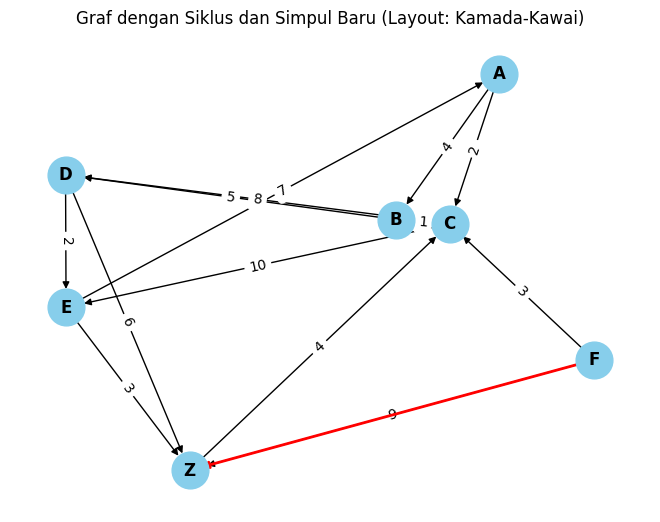

In [13]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

# 1. Graf dimodifikasi: tambahkan siklus & simpul baru 'F'
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'C': 1, 'D': 5},
    'C': {'D': 8, 'E': 10},
    'D': {'E': 2, 'Z': 6},
    'E': {'Z': 3, 'A': 7},  # ← siklus kembali ke A
    'Z': {'C': 4},          # ← siklus dari Z ke C
    'F': {'C': 3, 'Z': 9},  # ← simpul baru
}

# 2. Dijkstra
def dijkstra_with_paths(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous = {node: None for node in graph}
    queue = [(0, start)]

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    return distances, previous

# 3. Rekonstruksi Jalur
def get_path(previous, end):
    path = []
    current = end
    while current:
        path.insert(0, current)
        current = previous[current]
    return path

# 4. Visualisasi Graf dengan Layout Kamada-Kawai
def visualize_graph(graph, path=None):
    G = nx.DiGraph()

    for node, edges in graph.items():
        for neighbor, weight in edges.items():
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.kamada_kawai_layout(G)  # Ubah ke circular_layout jika diinginkan
    edge_labels = nx.get_edge_attributes(G, 'weight')

    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)

    plt.title("Graf dengan Siklus dan Simpul Baru (Layout: Kamada-Kawai)")
    plt.show()

# 5. Jalankan Dijkstra dan visualisasi
start_node = 'F'  # ← kita mulai dari simpul baru
end_node = 'Z'
distances, previous = dijkstra_with_paths(graph, start_node)

shortest_path = get_path(previous, end_node)
print(f"Jarak dari {start_node} ke {end_node}: {distances[end_node]}")
print(f"Jalur: {' → '.join(shortest_path)}")

visualize_graph(graph, path=shortest_path)
